In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
import seaborn as sea
import sqlite3 
import warnings
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
con = sqlite3.connect('inventory.db')

df = pd.read_sql_query("SELECT * FROM VendorSalesSummary", con)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06


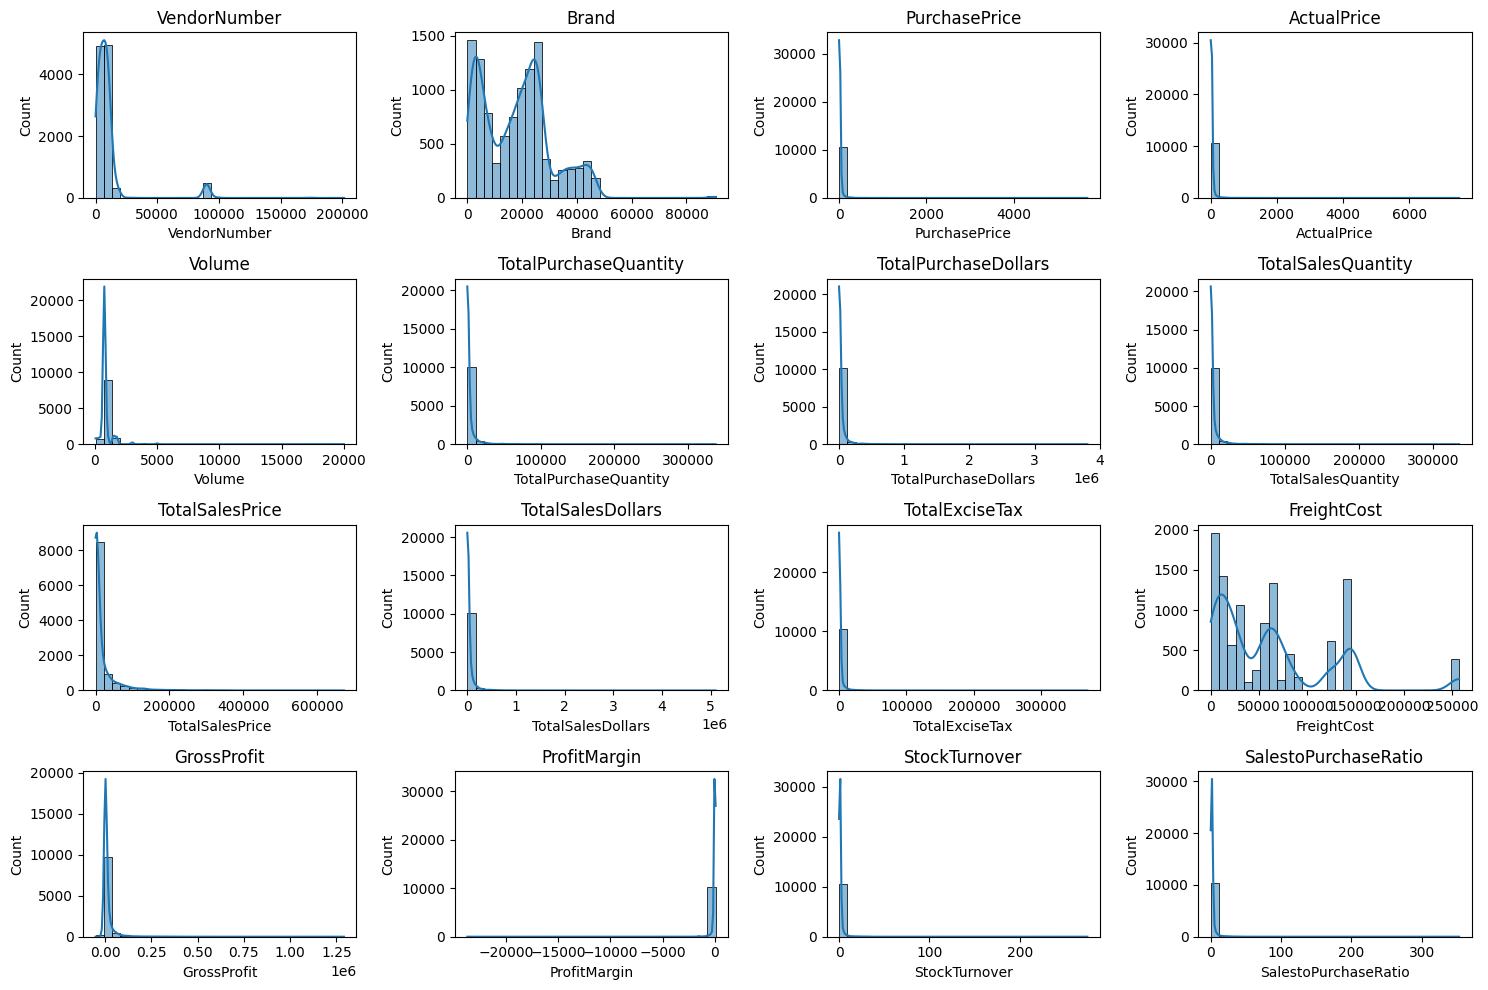

In [4]:
numerical_cols = df.select_dtypes(include=np.number).columns

mat.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    mat.subplot(4, 4, i+1)
    sea.histplot(df[col], kde=True, bins=30)
    mat.title(col)
mat.tight_layout()
mat.show()

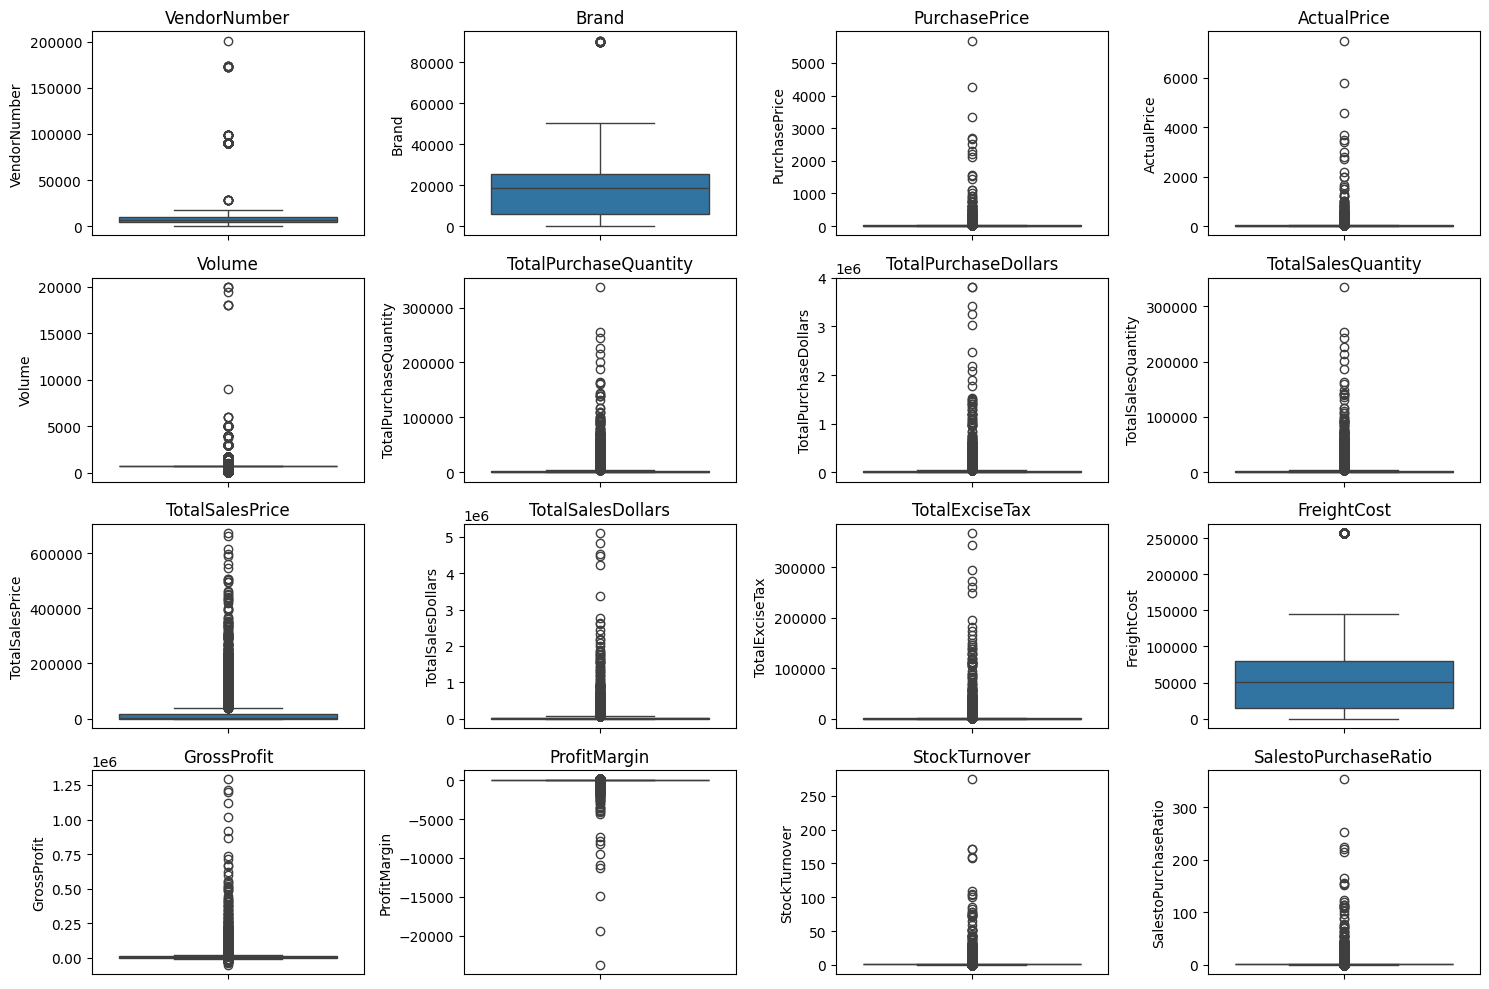

In [5]:
mat.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    mat.subplot(4, 4, i+1)
    sea.boxplot(y=df[col])
    mat.title(col)
mat.tight_layout()
mat.show()


Summary Statistics Insights:
Negative & Zero Values:
    • Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price..
    • Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.
    • Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.
Outliers Indicated by High Standard Deviations:
    • Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.
    • Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.
    • Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.
Activate Windows

In [6]:
new_df = pd.read_sql(
    """
        SELECT
            *
        FROM
            VendorSalesSummary
        WHERE
            GrossProfit > 0 AND ProfitMargin > 0 AND TotalSalesQuantity > 0
    """, con)

new_df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesPrice,TotalSalesDollars,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,672819.31,5101919.51,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,561512.37,4819073.49,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,461140.15,4538120.60,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,420050.01,4475972.88,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,545778.28,4223107.62,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,10.96,15.95,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,1.47,65.66,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,0.99,1.98,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,77.61,143.28,15.12,257032.07,141.81,98.974037,72.000000,97.469388


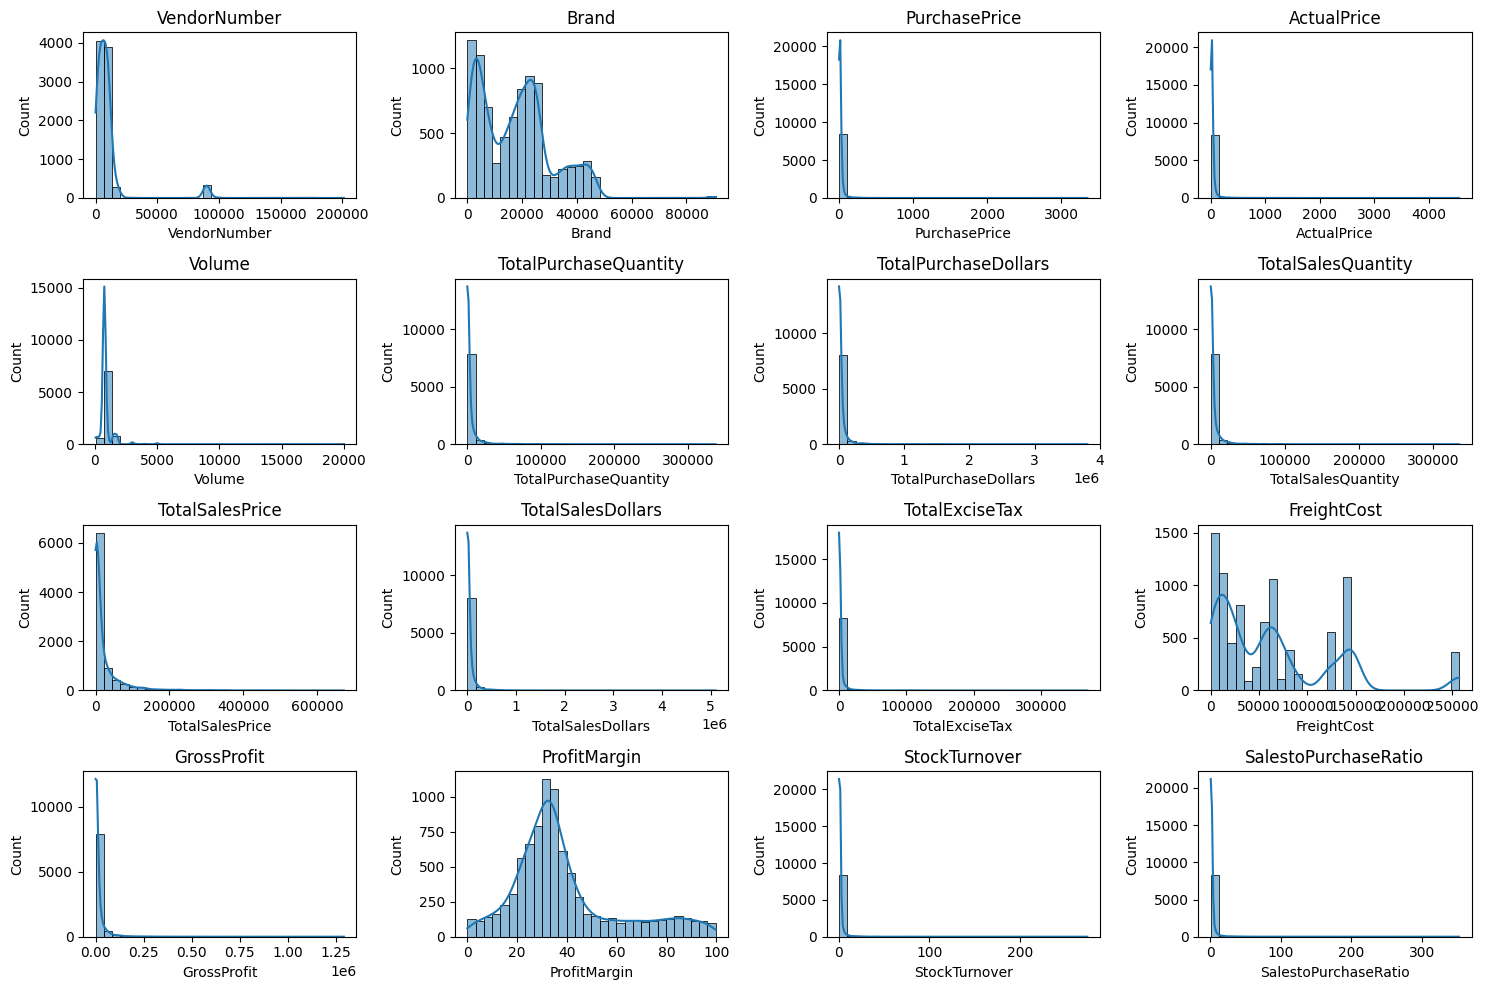

In [7]:
numerical_cols = new_df.select_dtypes(include=np.number).columns

mat.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    mat.subplot(4, 4, i+1)
    sea.histplot(new_df[col], kde=True, bins=30)
    mat.title(col)
mat.tight_layout()
mat.show()

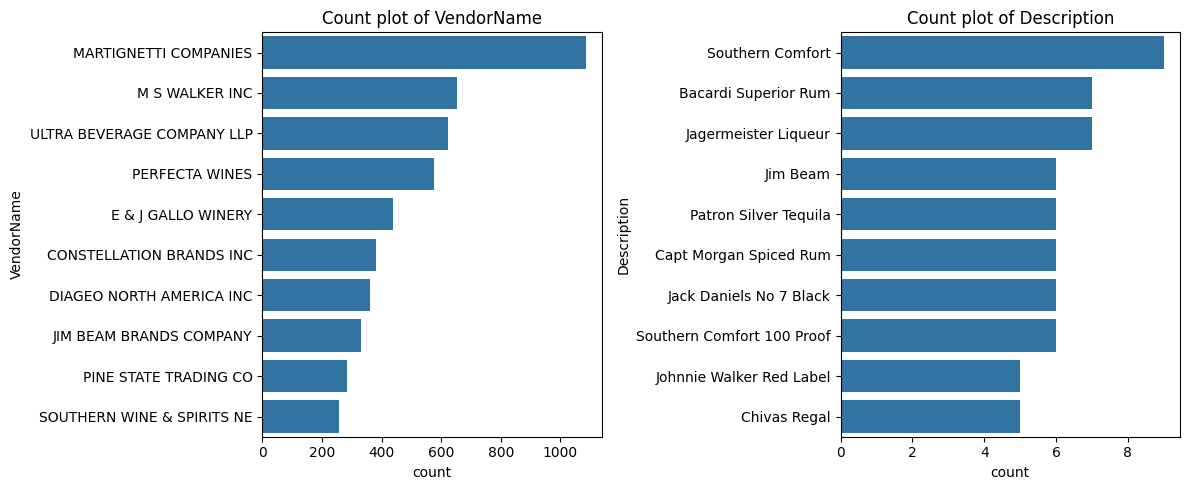

In [8]:
categorical_cols = ['VendorName', 'Description']

mat.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    mat.subplot(1, 2, i+1)
    sea.countplot(y=new_df[col], order=new_df[col].value_counts().index[:10])
    mat.title(f"Count plot of {col}")
mat.tight_layout()
mat.show()

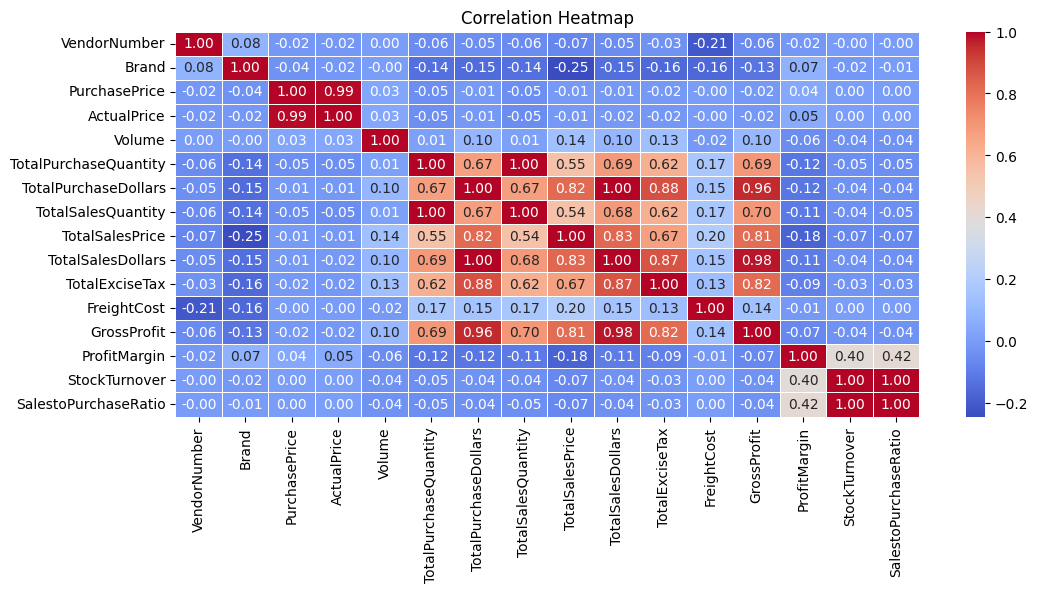

In [9]:
mat.figure(figsize=(12, 5))

correlation_matrix = new_df[numerical_cols].corr()
sea.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
mat.title("Correlation Heatmap")
mat.show()


Correlation Insights
• PurchasePrice has weak correlations with TotalSales Dollars (-0.012) and Gross Profit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
• Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.
• Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
• StockTurnover has weak negative correlations with both Gross Profit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.

In [10]:
brand_performance = new_df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'ProfitMargin': 'mean'
}).reset_index()

In [11]:
low_sales_threashold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [12]:
low_sales_threashold

np.float64(560.299)

In [13]:
high_margin_threshold

np.float64(64.97017552750113)

In [14]:
target_brands = brand_performance[
    (brand_performance['ProfitMargin'] >= high_margin_threshold) & (brand_performance['TotalSalesDollars'] <= low_sales_threashold)
]

print("Brands with High Profit Margin but low Sales: ")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with High Profit Margin but low Sales: 


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [15]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]

In [16]:
def format_dollar(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    if value >= 1_000:
        return f"{value / 1_000:.2f}K"

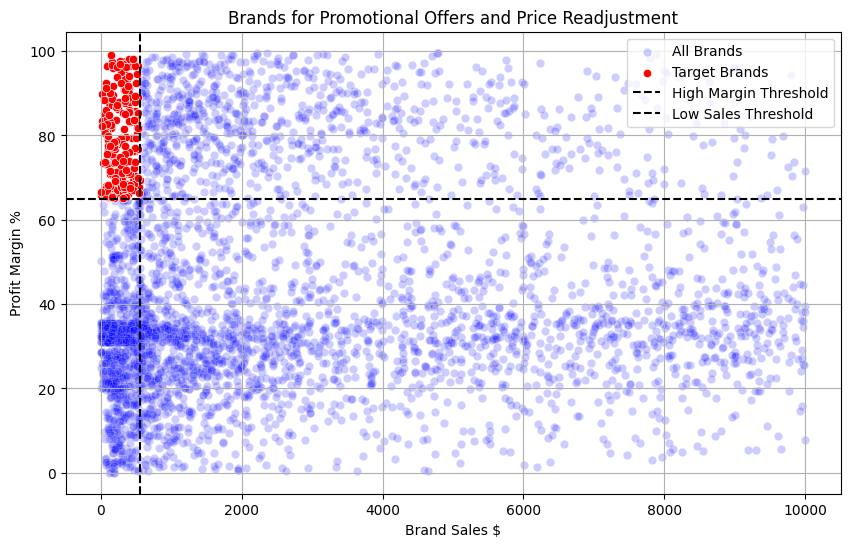

In [17]:
mat.figure(figsize=(10, 6))

sea.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha=0.2)
sea.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

mat.axhline(high_margin_threshold, linestyle="--", color="black", label="High Margin Threshold")
mat.axvline(low_sales_threashold, linestyle="--", color="black", label= "Low Sales Threshold")

mat.xlabel("Brand Sales $")
mat.ylabel("Profit Margin %")
mat.title("Brands for Promotional Offers and Price Readjustment")
mat.legend()
mat.grid(True)
mat.show()

In [18]:
top_vendor = new_df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = new_df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)

top_brands = top_brands.apply(lambda x: format_dollar(x))
top_vendor = top_vendor.apply(lambda x: format_dollar(x))

print(top_brands)
print("----------------------------------")
print(top_vendor)

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object
----------------------------------
VendorName
DIAGEO NORTH AMERICA INC      67.99M
MARTIGNETTI COMPANIES         39.33M
PERNOD RICARD USA             32.06M
JIM BEAM BRANDS COMPANY       31.42M
BACARDI USA INC               24.85M
CONSTELLATION BRANDS INC      24.22M
E & J GALLO WINERY            18.40M
BROWN-FORMAN CORP             18.25M
ULTRA BEVERAGE COMPANY LLP    16.50M
M S WALKER INC                14.71M
Name: TotalSalesDollars, dtype: object


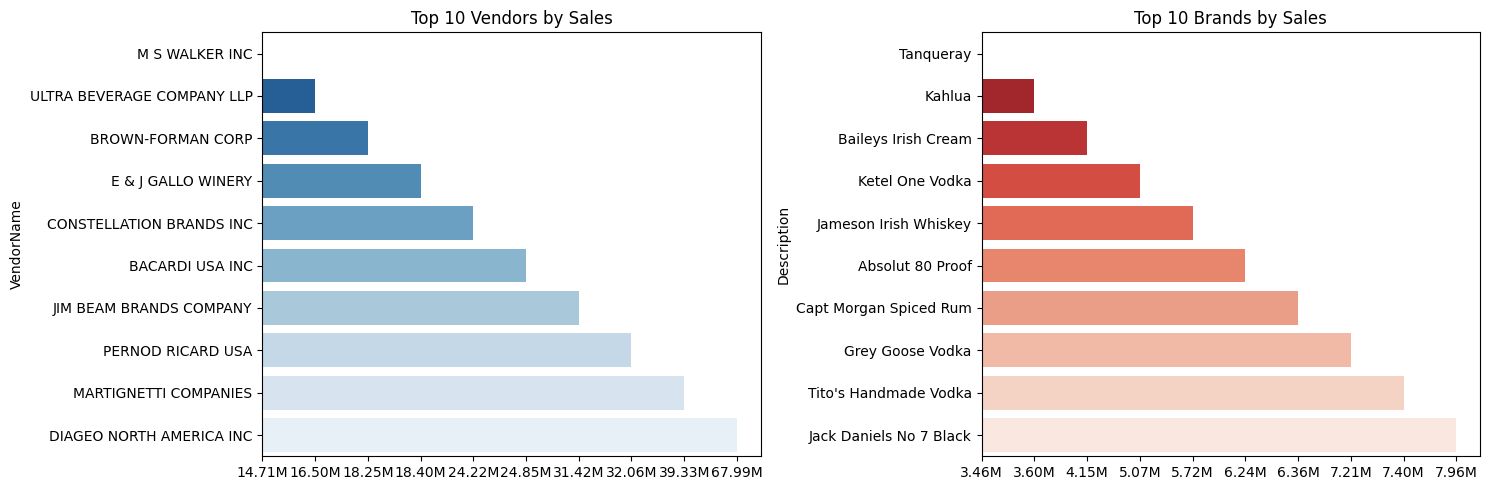

In [19]:
vend = top_vendor.sort_values(ascending=True)   # smallest first
brand = top_brands.sort_values(ascending=True)

mat.figure(figsize=(15, 5))

mat.subplot(1, 2, 1)
ax1 = sea.barplot(y=vend.index.astype(str), x=vend.values, palette="Blues_r", orient="h")
mat.title("Top 10 Vendors by Sales")

mat.subplot(1, 2, 2)
ax2 = sea.barplot(y=brand.index.astype(str), x=brand.values, palette="Reds_r", orient="h")
mat.title("Top 10 Brands by Sales")

mat.tight_layout()
mat.show()

# for bar in ax1.patches:
#     ax1.text(bar.get_width() + (bar.get_width() * 0.02),
#             bar.get_y() + bar.get_height() / 2,
#             format_dollar(bar.get_width()),
#             ha="left", va="center", fontsize=10, color="black")

In [20]:
vendor_performance = new_df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [21]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

In [22]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending=False), 2)


In [23]:
top_vendor = vendor_performance.head(10)

top_vendor['TotalSalesDollars'] = top_vendor['TotalSalesDollars'].apply(format_dollar)
top_vendor['TotalPurchaseDollars'] = top_vendor['TotalPurchaseDollars'].apply(format_dollar)
top_vendor['GrossProfit'] = top_vendor['GrossProfit'].apply(format_dollar)

top_vendor



,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [24]:
top_vendor['CumulativeContribution%'] = top_vendor['PurchaseContribution%'].cumsum()

In [25]:
top_vendor

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,CumulativeContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


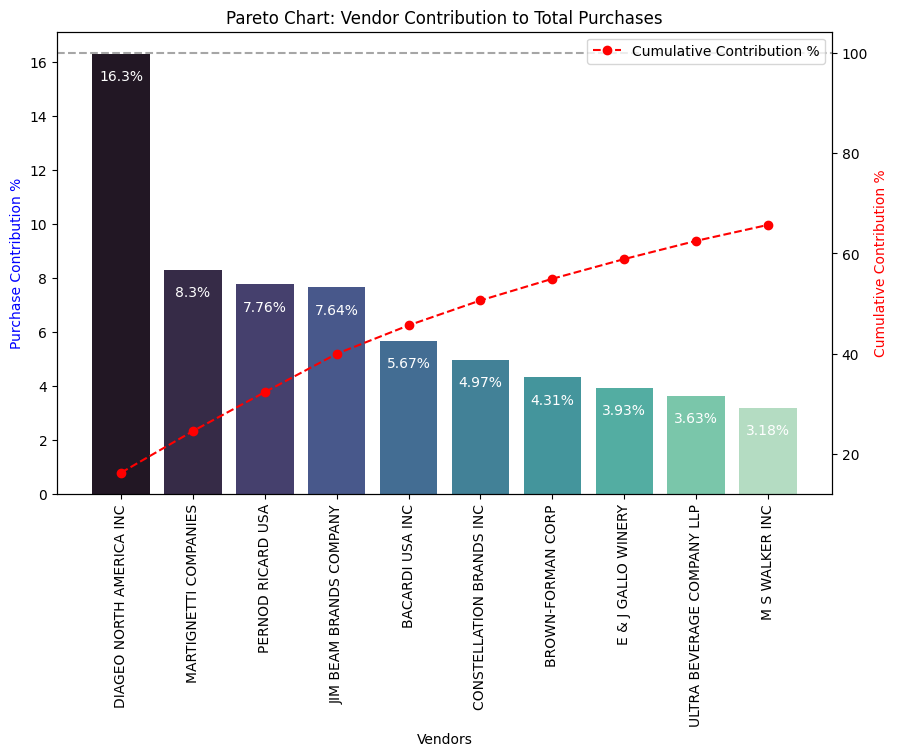

In [26]:
fig, ax1 = mat.subplots(figsize=(10, 6))

sea.barplot(
    x=top_vendor['VendorName'],
    y=top_vendor['PurchaseContribution%'],
    palette="mako",
    ax=ax1
)

for i, value in enumerate(top_vendor['PurchaseContribution%']):
    ax1.text(
        i, value - 1,               
        str(value) + '%',           
        ha='center', fontsize=10, color='white'
    )

ax2 = ax1.twinx()
ax2.plot(
    top_vendor['VendorName'],
    top_vendor['CumulativeContribution%'],
    color='red', marker='o', linestyle='dashed',
    label='Cumulative Contribution %'
)

ax1.set_xticklabels(top_vendor['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)

ax2.legend(loc='upper right')
mat.show()


In [27]:
print(f"Total Purchase Contribution of Top 10 vendors is: {round(top_vendor['PurchaseContribution%'].sum(), 2)}")

Total Purchase Contribution of Top 10 vendors is: 65.69


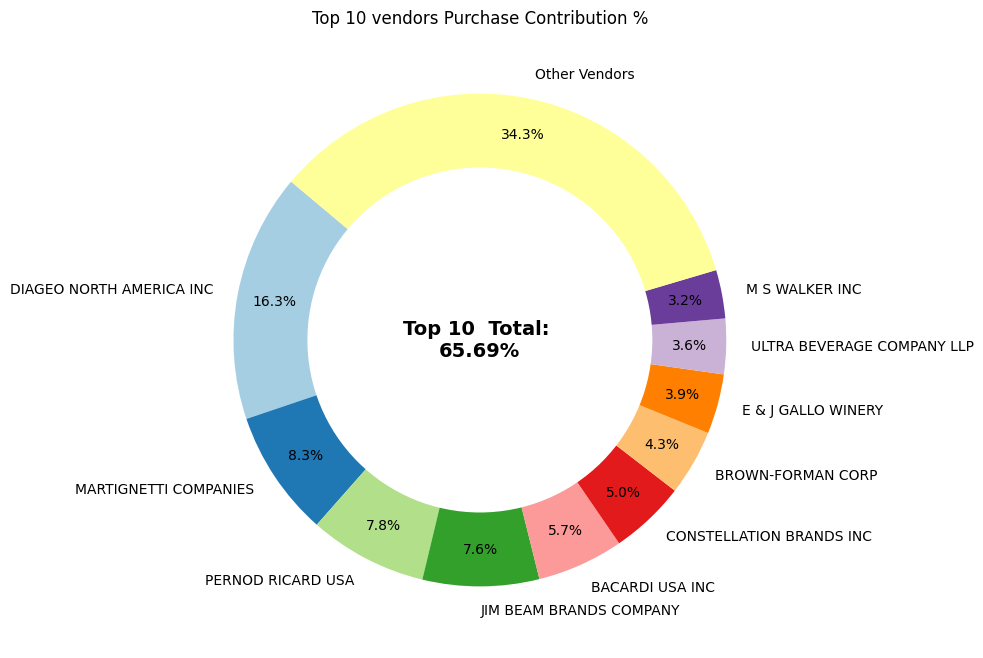

In [28]:
vendors = list(top_vendor['VendorName'].values)
purchase_contibution = list(top_vendor['PurchaseContribution%'].values)
total_contibution = sum(purchase_contibution)
remaining_contribution = 100 - total_contibution

vendors.append("Other Vendors")
purchase_contibution.append(remaining_contribution)

fig, ax = mat.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contibution, labels=vendors, autopct='%1.1f%%', startangle=140, pctdistance=0.85,
                                    colors=mat.cm.Paired.colors)

center_circle = mat.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(center_circle)

mat.text(0, 0, f"Top 10  Total: \n{total_contibution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

mat.title("Top 10 vendors Purchase Contribution %")
mat.show()

In [29]:
new_df['UnitPurchasePrice'] = new_df['TotalPurchaseDollars'] / new_df['TotalPurchaseQuantity']

In [30]:
new_df['OrderSize'] = pd.qcut(new_df['TotalPurchaseQuantity'], q=3, labels=["Small", "Medium", "Large"])

In [31]:
new_df.groupby(new_df['OrderSize'])[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


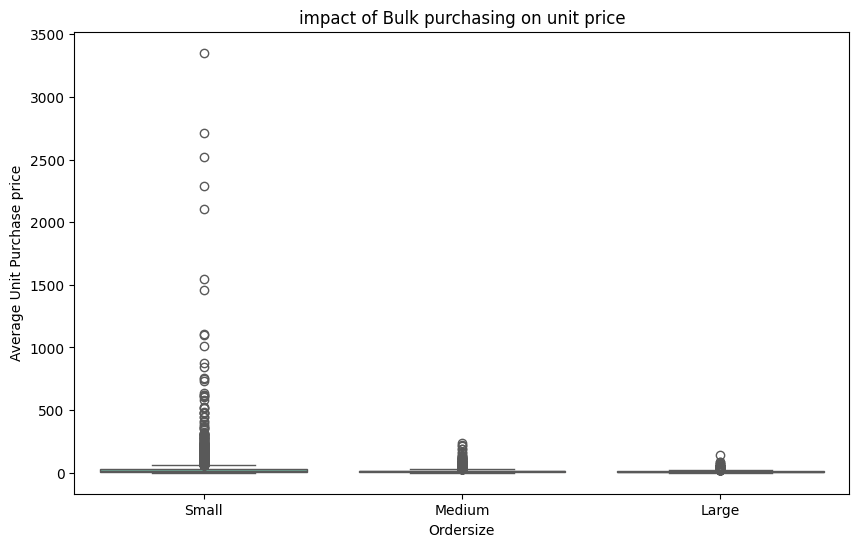

In [32]:
mat.figure(figsize=(10, 6))
sea.boxplot(x=new_df['OrderSize'], y=new_df['UnitPurchasePrice'], palette="Set2")
mat.title("impact of Bulk purchasing on unit price")
mat.xlabel("Ordersize")
mat.ylabel("Average Unit Purchase price")
mat.show()

In [33]:
new_df[new_df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending=True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [34]:
new_df['UnsoldInventoryValue'] = (new_df['TotalPurchaseQuantity'] - new_df['TotalSalesQuantity']) * new_df['PurchasePrice']
print(f"Total Unsold Captial: {format_dollar(new_df['UnsoldInventoryValue'].sum())}")

Total Unsold Captial: 2.71M


In [35]:
inventory_value_per_vendor = new_df.groupby('VendorName')['UnsoldInventoryValue'].sum().reset_index()
inventory_value_per_vendor = inventory_value_per_vendor.sort_values('UnsoldInventoryValue', ascending=False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollar)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K


In [36]:
top_threshold = new_df['TotalSalesDollars'].quantile(0.75)
low_threshold = new_df['TotalSalesDollars'].quantile(0.25)

In [37]:
top_filter_vendors = new_df[new_df['TotalSalesDollars'] >= top_threshold]['ProfitMargin'].dropna()
low_filter_vendors = new_df[new_df['TotalSalesDollars'] <= low_threshold]['ProfitMargin'].dropna()


In [38]:
import numpy as np
from scipy import stats

def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (30.74, 31.61), Mean: 31.18
Low Vendors 95% CI: (40.50, 42.64), Mean: 41.57


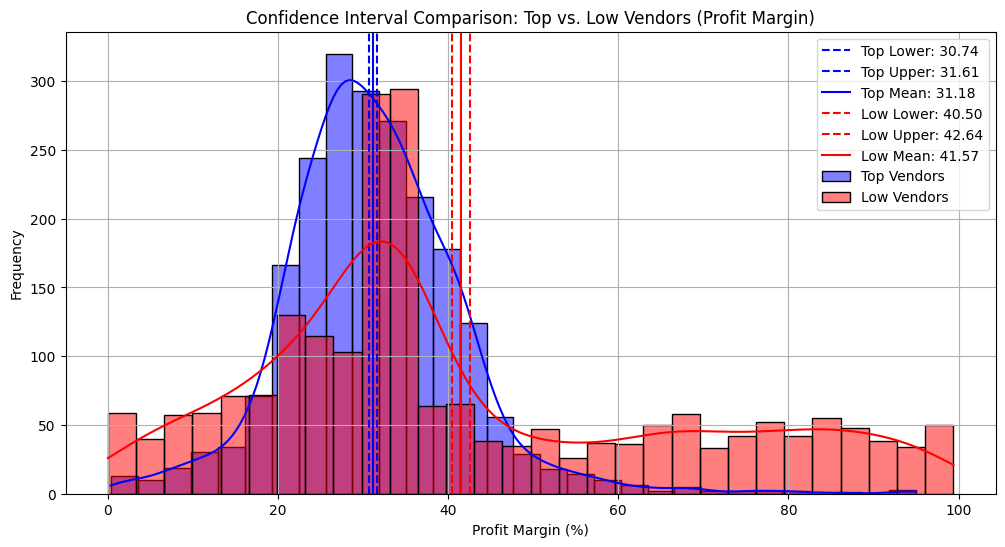

In [39]:
top_mean, top_lower, top_upper = confidence_interval(top_filter_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_filter_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

mat.figure(figsize=(12, 6))

sea.histplot(top_filter_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
mat.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
mat.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
mat.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

sea.histplot(low_filter_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
mat.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
mat.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
mat.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

mat.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
mat.xlabel("Profit Margin (%)")
mat.ylabel("Frequency")
mat.legend()
mat.grid()
mat.show()


In [42]:
new_df.to_csv("./data/VendorPerformanceSummary.csv")

In [43]:
brand_performance.head(5)

,Description,TotalSalesDollars,ProfitMargin
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
5,10 Span Pnt Nr CC,2441.74,25.836084
